# Imports

In [1]:
import pickle
from skimage import io

# Code From Zach

In [2]:
input_directory = "./data/processed/"
with open(input_directory + "PhotoTable.p", 'rb') as pickle_file:
    photo_info = pickle.load(pickle_file)
photo_info

,Filename,City,Target
File,,,
1_1,1_1.jpg,Chicago,False
1_2,1_2.jpg,Chicago,False
1_3,1_3.jpg,Chicago,False
1_4,1_4.jpg,Chicago,False
1_5,1_5.jpg,Chicago,False
...,...,...,...
12_6,12_6.jpg,Toronto,False
12_7,12_7.jpg,Toronto,False
12_8,12_8.jpg,Toronto,False


(3744, 5616)

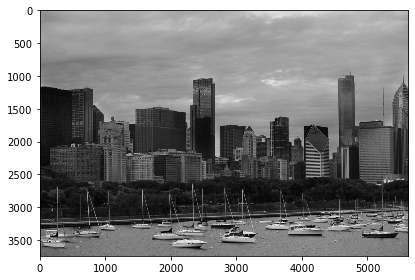

In [3]:
sample_photo = io.imread(input_directory + photo_info.loc['1_1', 'Filename'])
io.imshow(sample_photo)
sample_photo.shape